# PCA Classification kNN & SVM


In [1]:
import os
import cv2 
import numpy as np
import pandas as pd 
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline

from keras.preprocessing import image

from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [2]:
CUDA_VISIBLE_DEVICES = 1

## Loading in the Dataset and store in numpy array


In [3]:
images = []
label = []

img_path = r'C:\Users\melte\Desktop\Males\Extra\IndBE_KunstCEO'
listImgs = os.listdir(img_path)
img_size = 224

# LOAD IN THE IMAGES
for k in range(0,len(listImgs)):
    img = cv2.imread(('\\'.join([img_path,listImgs[k]])).format(img_path),-1)
    GRAY = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    if "IndBE" in listImgs[k]:
        label.append(1)
        images.append(GRAY)
    elif "KunstCEO" in listImgs[k]:
        label.append(0)
        images.append(GRAY)
    pass 

n = len(images)

#Create test and train set
X_train, X_test, y_train, y_test = train_test_split(images, label, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

#transform to numpy arrays for crosstab: 
X_train = np.array(X_train)
X_test = np.array(X_test)
X_val = np.array(X_val)
y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)

#number of instances in train, test, val 
n_train = len(X_train)
n_test = len(X_test)
n_val = len(X_val)

In [4]:
#flatten arrays for further processing 
X_train = X_train.reshape(n_train, img_size*img_size)
X_test = X_test.reshape(n_test, img_size*img_size)
X_val = X_val.reshape(n_val, img_size*img_size)

## Feature Extraction: PCA 

In [5]:
from sklearn.decomposition import PCA 
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler

#defining components based on % of all components 
c1 = int(n_train*0.8)
c2 = int(n_train*0.5)
c3 = int(n_train*0.2)

#Scaling the input
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_val_s = scaler.transform(X_val)
X_test_s = scaler.transform(X_test)
# X_train_s = scale(X_train, axis = 0)
# X_val_s = scale(X_val, axis = 0)
# X_test_s = scale(X_test, axis = 0)

mu = np.mean(X_train_s, axis=0)

#No. of principal components 
n_components = c2

#___________________________________________________________________________
# LINEAR PCA
pca = PCA(n_components=n_components)
pca.fit(X_train_s)

X_train_r = np.dot(pca.transform(X_train_s), pca.components_)
X_train_r += mu

X_val_r = np.dot(pca.transform(X_val_s), pca.components_)
X_val_r += mu

X_test_r = np.dot(pca.transform(X_test_s), pca.components_)
X_test_r += mu

print(n_components," Components explain ", np.amax((np.cumsum(pca.explained_variance_ratio_ ))*100),"% of the variance")

#_____________________________________________________________________________

# # KERNEL PCA
# pca = KernelPCA(kernel='linear', fit_inverse_transform=True)
# pca.fit(X_train)

# #transform data in eigenface space -> only n_data x 100 instead of 10000
# X_train_pca = pca.transform(X_train_s)
# X_val_pca = pca.transform(X_val_s)
# X_test_pca = pca.transform(X_test_s)

# #retransform data
# X_train_r = pca.inverse_transform(X_train_pca)
# X_val_r = pca.inverse_transform(X_val_pca)
# X_test_r = pca.inverse_transform(X_test_pca)


C:\Users\melte\Anaconda3\envs\me\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\melte\Anaconda3\envs\me\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\melte\Anaconda3\envs\me\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\melte\Anaconda3\envs\me\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


255  Components explain  96.78985258819917 % of the variance


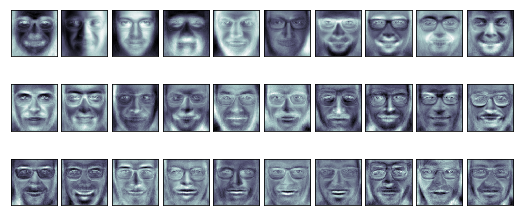

In [6]:
#ONLY FOR LINEAR PCA
fig, axes = plt.subplots(3, 10, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(img_size, img_size), cmap='bone')

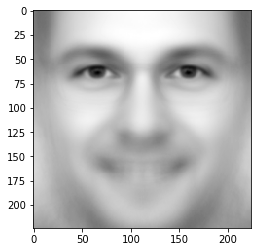

In [7]:
#Mean face: 
mean = np.mean(X_train, axis=0)
plt.imshow(mean.reshape(img_size,img_size), cmap = "gray")

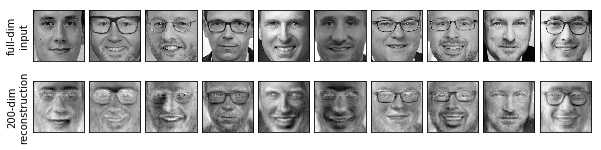

In [8]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(X_val[i].reshape(img_size, img_size), cmap='binary_r')
    ax[1, i].imshow(X_val_r[i].reshape(img_size, img_size), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('200-dim\nreconstruction');

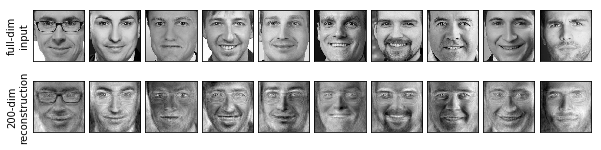

In [9]:
# Plot the results: Test set 
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(X_test[i].reshape(img_size, img_size), cmap='binary_r')
    ax[1, i].imshow(X_test_r[i].reshape(img_size, img_size), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('200-dim\nreconstruction');

### Plotting explained Variance with different number of components: 

80% of components:  99.26671817900696 % 
50% of components: 96.90076628328819 % 
20% of components: 90.37209216020763 %


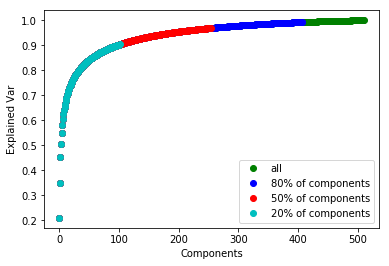

In [10]:
##___PLOTTING EXPLAINED VARIANCE WITH N COMPONENTS___###

#No. of principal components 
pca = PCA()
pca.fit(X_train)

ratio = pca.explained_variance_ratio_
cumSum = np.cumsum(ratio)


ax2 = plt.subplot(1, 1, 1)
ax2.plot(cumSum, 'go', label = "all")
ax2.set_xlabel('Components')
ax2.set_ylabel('Explained Var')

cumSumTop80 = np.cumsum(ratio[:c1])
cumSumTop50 = np.cumsum(ratio[:c2])
cumSumTop20 = np.cumsum(ratio[:c3])

max_n = np.amax(cumSum)
max80 = np.amax(cumSumTop80)
max50 = np.amax(cumSumTop50)
max20 = np.amax(cumSumTop20)

ax2.plot(cumSumTop80, 'bo', label = "80% of components")
ax2.plot(cumSumTop50, 'ro', label = "50% of components")
ax2.plot(cumSumTop20, 'co', label = "20% of components")

print("80% of components: ", (max80/max_n)*100, "%",
      "\n50% of components:", (max50/max_n)*100, "%",
      "\n20% of components:", (max20/max_n)*100, "%")

plt.legend()

## K-NN Classifier 

In [11]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, classification_report


knn_fit = KNeighborsClassifier(n_neighbors = 15, p = 2, metric = 'minkowski')

knn_fit.fit(X_train_r, y_train)

train_res = knn_fit.predict(X_train_r)
val_res = knn_fit.predict(X_val_r)
test_res = knn_fit.predict(X_test_r)
# print(train_res)

print("\nkNN - Train Confusion Matrix\n\n",
      pd.crosstab(y_train, train_res, rownames = ["Actual"], colnames = ["Predicted"]))
print("\nkNN - Train Accuracy:", round(accuracy_score(y_train, train_res),3))
print("\nkNN - Train Classification Report\n",classification_report(y_train, train_res)) 


print("\n\nkNN - Val Confusion Matrix\n\n",
      pd.crosstab(y_val, val_res, rownames = ["Actual"], colnames = ["Predicted"]))
print("\nkNN - Val Accuracy:", round(accuracy_score(y_val, val_res),3))
print("\nkNN - Test Classification Report\n",classification_report(y_val, val_res))

print("\n\nrSVM - Test Confusion Matrix\n\n",
      pd.crosstab(y_test, test_res, rownames = ["Actual"], colnames = ["Predicted"]))
print("\nrSVM - Test Accuracy:", round(accuracy_score(y_test, test_res),3))
print("\nrSVM - Test Classification Report\n",classification_report(y_test, test_res))


kNN - Train Confusion Matrix

 Predicted    0    1
Actual             
0          112  137
1           55  207

kNN - Train Accuracy: 0.624

kNN - Train Classification Report
               precision    recall  f1-score   support

           0       0.67      0.45      0.54       249
           1       0.60      0.79      0.68       262

   micro avg       0.62      0.62      0.62       511
   macro avg       0.64      0.62      0.61       511
weighted avg       0.64      0.62      0.61       511



kNN - Val Confusion Matrix

 Predicted   0   1
Actual           
0          24  44
1          19  41

kNN - Val Accuracy: 0.508

kNN - Test Classification Report
               precision    recall  f1-score   support

           0       0.56      0.35      0.43        68
           1       0.48      0.68      0.57        60

   micro avg       0.51      0.51      0.51       128
   macro avg       0.52      0.52      0.50       128
weighted avg       0.52      0.51      0.49       128



rS

##### Tune parameters: n_components_pca, n_neighbors_knn

### Plotting accuracies for varying K values: 

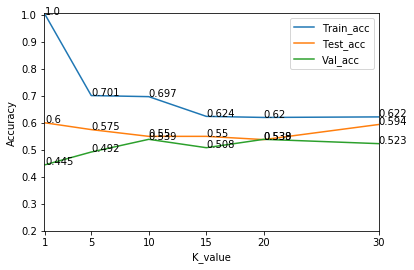

In [12]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, classification_report


array = np.empty((5,4))
k_valchart = pd.DataFrame(array)
k_valchart.columns = ["K_value", "Train_acc", "Test_acc", "Val_acc"]

k_vals = [1,5,10,15,20,30]

for i in range (len(k_vals)):
    knn_fit = KNeighborsClassifier(n_neighbors = k_vals[i], p=2, metric='minkowski')
    knn_fit.fit(X_train_r, y_train)
    tr_accscore = round(accuracy_score(y_train, knn_fit.predict(X_train_r)), 3)
    test_accscore = round(accuracy_score(y_test, knn_fit.predict(X_test_r)), 3)
    val_accscore = round(accuracy_score(y_val, knn_fit.predict(X_val_r)), 3)
    
    k_valchart.loc[i, 'K_value'] = k_vals[i]
    k_valchart.loc[i, 'Train_acc'] = tr_accscore
    k_valchart.loc[i, 'Test_acc'] = test_accscore
    k_valchart.loc[i, 'Val_acc'] = val_accscore
    
#PLOTTING ACCURACIES OVER DIFFERENT K VALUES 
plt.figure() 
plt.xlabel('K_value')
plt.ylabel('Accuracy')
plt.plot(k_valchart["K_value"], k_valchart["Train_acc"])
plt.plot(k_valchart["K_value"], k_valchart["Test_acc"])
plt.plot(k_valchart["K_value"], k_valchart["Val_acc"])

plt.axis([0.9, 5, 0.2, 1.005])
plt.xticks([1,5,10,15,20,30])

for a,b in zip(k_valchart["K_value"], k_valchart["Train_acc"]):
    plt.text(a, b, str(b), fontsize = 10)
    
for a,b in zip(k_valchart["K_value"], k_valchart["Test_acc"]):
    plt.text(a, b, str(b), fontsize = 10)
    
for a,b in zip(k_valchart["K_value"], k_valchart["Val_acc"]):
    plt.text(a, b, str(b), fontsize = 10)
    
plt.legend(loc = 'upper right')
plt.show()

## Support Vector Machines:

In [13]:
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.svm import SVC 

#radial
SVM = SVC(kernel = 'rbf', gamma = 'scale', C=20.0)
#polynomial
# SVM = SVC(kernel = 'poly', C=1.0, degree = 2)
SVM.fit(X_train_r, y_train)

train_SVM = SVM.predict(X_train_r)
val_SVM = SVM.predict(X_val_r)
test_SVM = SVM.predict(X_test_r)


print("\nK-NN - Train Confusion Matrix\n\n",
      pd.crosstab(y_train, train_SVM, rownames = ["Actual"], colnames = ["Predicted"]))
print("\nK-NN - Train Accuracy:", round(accuracy_score(y_train, train_SVM),3))
print("\nK-NN - Train Classification Report\n",classification_report(y_train, train_SVM)) 


print("\nK-NN - Val Confusion Matrix\n\n",
      pd.crosstab(y_val, val_SVM, rownames = ["Actual"], colnames = ["Predicted"]))
print("\nK-NN - Val Accuracy:", round(accuracy_score(y_val, val_SVM),3))
print("\nK-NN - Test Classification Report\n",classification_report(y_val, val_SVM) )


print("\nK-NN - Test Confusion Matrix\n\n",
      pd.crosstab(y_test, test_SVM, rownames = ["Actual"], colnames = ["Predicted"]))
print("\nK-NN - Test Accuracy:", round(accuracy_score(y_test, test_SVM),3))
print("\nK-NN - Test Classification Report\n",classification_report(y_test, test_SVM) )


K-NN - Train Confusion Matrix

 Predicted    0    1
Actual             
0          249    0
1            0  262

K-NN - Train Accuracy: 1.0

K-NN - Train Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00       262

   micro avg       1.00      1.00      1.00       511
   macro avg       1.00      1.00      1.00       511
weighted avg       1.00      1.00      1.00       511


K-NN - Val Confusion Matrix

 Predicted   0   1
Actual           
0          41  27
1          19  41

K-NN - Val Accuracy: 0.641

K-NN - Test Classification Report
               precision    recall  f1-score   support

           0       0.68      0.60      0.64        68
           1       0.60      0.68      0.64        60

   micro avg       0.64      0.64      0.64       128
   macro avg       0.64      0.64      0.64       128
weighted avg       0.65      0.64      0.64       128




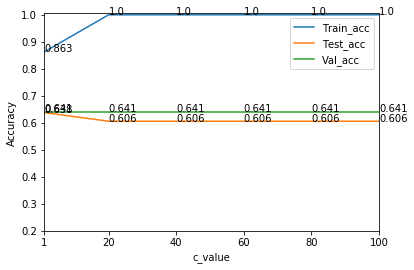

In [14]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, classification_report


array = np.empty((5,4))
k_valchart = pd.DataFrame(array)
k_valchart.columns = ["c_value", "Train_acc", "Val_acc", "Test_acc"]

vals = [1,20,40,60,80,100]

for i in range (len(vals)):
    SVM = SVC(kernel = 'rbf', gamma = 'scale', C=(vals[i]))
    SVM.fit(X_train_r, y_train)
    train_SVM = SVM.predict(X_train_r)
    test_SVM = SVM.predict(X_test_r)
    val_SVM = SVM.predict(X_val_r)
    
    tr_accscore = round(accuracy_score(y_train, train_SVM), 3)
    test_accscore = round(accuracy_score(y_test, test_SVM), 3)
    val_accscore = round(accuracy_score(y_val, val_SVM), 3)
    
    k_valchart.loc[i, 'c_value'] = vals[i]
    k_valchart.loc[i, 'Train_acc'] = tr_accscore
    k_valchart.loc[i, 'Test_acc'] = test_accscore
    k_valchart.loc[i, 'Val_acc'] = val_accscore
    
#PLOTTING ACCURACIES OVER DIFFERENT K VALUES 
plt.figure() 
plt.xlabel('c_value')
plt.ylabel('Accuracy')
plt.plot(k_valchart["c_value"], k_valchart["Train_acc"])
plt.plot(k_valchart["c_value"], k_valchart["Test_acc"])
plt.plot(k_valchart["c_value"], k_valchart["Val_acc"])

plt.axis([0.9, 5, 0.2, 1.005])
plt.xticks([1,20,40,60,80,100])

for a,b in zip(k_valchart["c_value"], k_valchart["Train_acc"]):
    plt.text(a, b, str(b), fontsize = 10)

for a,b in zip(k_valchart["c_value"], k_valchart["Test_acc"]):
    plt.text(a, b, str(b), fontsize = 10)
    
for a,b in zip(k_valchart["c_value"], k_valchart["Val_acc"]):
    plt.text(a, b, str(b), fontsize = 10)
    
plt.legend(loc = 'upper right')
plt.show()